# Paired Simulations

In [1]:
# import modules
from nbodykit.lab import *
from fastpm.nbkit import FastPMCatalogSource
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../general_routines/')
from general_tools import *
from catalogue_generation import *

In [2]:
# Global Parameters
Nc = 128
Length = 499.2 # Mpc  h-1
zobs = 0.3
zinit = 3.

In [3]:
# Setup initial conditions
cosmo = cosmology.Planck15

# Generate IC density field
power = cosmology.LinearPower(cosmo, redshift=zobs)
linear = LinearMesh(power, BoxSize=Length, Nmesh=Nc) # Gaussian realization of linear theory power spectrum
linear.save('Initialrealization.bigfile')

# P(k) of initial field
r = FFTPower(linear, mode="1d")
Pkdelta = r.power['power'].real
k_array = r.power['k']

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


Text(0.5, 1.0, 'Gaussian Realization')

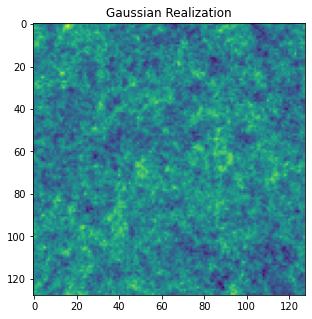

In [6]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(linear.preview(axes=[0,1]))
plt.title('Gaussian Realization')
# plt.savefig('gaussianfield.pdf')

In [4]:
linearkfix = linear.apply(obtain_paired, mode='complex', kind='wavenumber')

In [6]:
deltafix = linearkfix.to_field(mode='real')
deltafix = FieldMesh(deltafix)
deltafix.save('paired1_Lmesh.bigfile')

r = FFTPower(deltafix, mode='1d')
PkIC1 = r.power['power'].real

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


In [7]:
minusdeltafix = -1*linearkfix.to_field(mode='real')
minusdeltafix = FieldMesh(minusdeltafix)
minusdeltafix.save('paired2_Lmesh.bigfile')

r = FFTPower(minusdeltafix, mode='1d')
PkIC2 = r.power['power'].real

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


Text(0.5, 1.0, '$-\\delta$ fix')

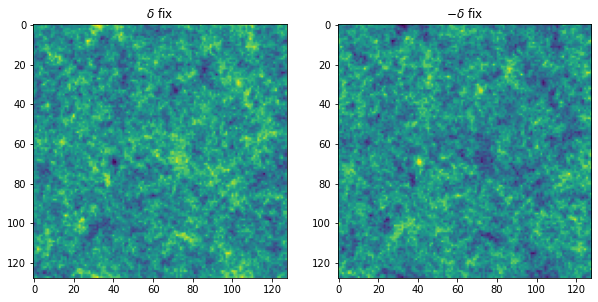

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(deltafix.preview(axes=[0,1]))
ax[0].set_title(r'$\delta$ fix')
ax[1].imshow(minusdeltafix.preview(axes=[0,1]))
ax[1].set_title(r'$-\delta$ fix')

# plt.savefig('input_fields.pdf')

Text(0, 0.5, '$P(k)$ $[h^{-3} \\mathrm{Mpc}^{3}]$')

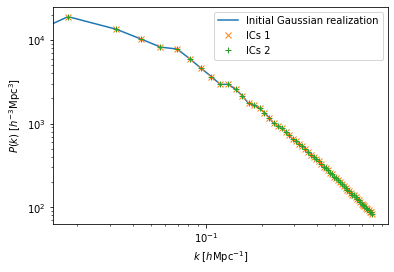

In [9]:
plt.loglog(k_array, Pkdelta, label='Initial Gaussian realization')
plt.loglog(k_array, PkIC1, 'x', label='ICs 1')
plt.loglog(k_array, PkIC2, '+', label='ICs 2')
plt.legend()
plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^{3}]$')
# plt.savefig('Pk_ICs.pdf')

In [10]:
matter1 = FastPMCatalogSource(deltafix, cosmo=cosmo, Nsteps=10)
NL_mesh1 = matter1.to_mesh(resampler='cic', interlaced=True, compensated=True)
NL_mesh1.save('paired1_NLmesh.bigfile')

matter2 = FastPMCatalogSource(minusdeltafix, cosmo=cosmo, Nsteps=10)
NL_mesh2 = matter2.to_mesh(resampler='cic', interlaced=True, compensated=True)
NL_mesh2.save('paired2_NLmesh.bigfile')

Text(0.5, 1.0, 'Simulation 2')

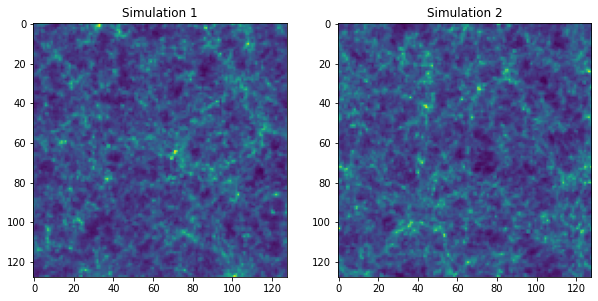

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(NL_mesh1.preview(axes=[0,1]))
ax[0].set_title('Simulation 1')
ax[1].imshow(NL_mesh2.preview(axes=[0,1]))
ax[1].set_title('Simulation 2')

#plt.savefig('paired_density_fields.pdf')

In [12]:
r = FFTPower(NL_mesh1, mode='1d')
Pk1 = r.power['power'].real - r.power.attrs['shotnoise']
r = FFTPower(NL_mesh2, mode='1d')
Pk2 = r.power['power'].real - r.power.attrs['shotnoise']

Text(0, 0.5, '$P(k)$ $[h^{-3} \\mathrm{Mpc}^3]$')

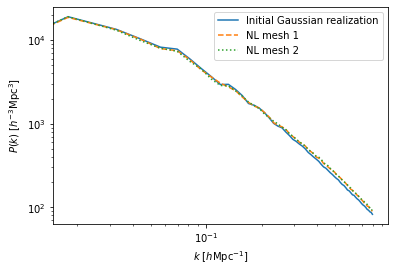

In [13]:
plt.loglog(k_array, Pkdelta, label='Initial Gaussian realization')
plt.loglog(k_array, Pk1, '--', label='NL mesh 1')
plt.loglog(k_array, Pk2, ':', label='NL mesh 2')
plt.legend()
plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$')
# plt.savefig('Pk_pairedsim_nc128.pdf')

In [14]:
NLfield1 = NL_field(linear, NL_mesh1)
NLfield1 = FieldMesh(NLfield1)

NLfield2 = NL_field(linear, NL_mesh2)
NLfield2 = FieldMesh(NLfield2)

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


In [15]:
r = FFTPower(NLfield1, mode='1d')
Pk1 = r.power['power'].real - r.power.attrs['shotnoise']
r = FFTPower(NLfield2, mode='1d')
Pk2 = r.power['power'].real - r.power.attrs['shotnoise']

Text(0, 0.5, '$P(k)$ $[h^{-3} \\mathrm{Mpc}^3]$')

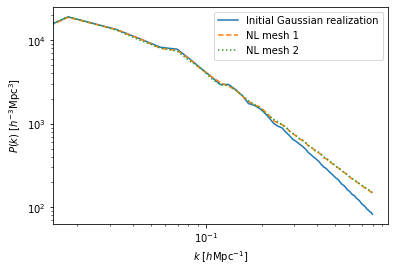

In [16]:
plt.loglog(k_array, Pkdelta, label='Initial Gaussian realization')
plt.loglog(k_array, Pk1, '--', label='NL mesh 1')
plt.loglog(k_array, Pk2, ':', label='NL mesh 2')
plt.legend()
plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$')

In [17]:
forward_displf1 = compute_Psi(Length, Nc, NLfield1.compute(mode='real') - 1.)
matter_pos1 = forward_evolution(Length, Nc, forward_displf1)

forward_displf2 = compute_Psi(Length, Nc, NLfield2.compute(mode='real') - 1.)
matter_pos2 = forward_evolution(Length, Nc, forward_displf2)

In [18]:
ww = np.ones(len(matter_pos1))
with open('matter1_file.dat', 'wb') as ff:
    matter_pos1.tofile(ff); ww.tofile(ff); ff.seek(0)

matter_cat1 = BinaryCatalog(ff.name, [('Position', ('f8', 3)), ('Mass', ('f8', 1))], size=len(matter_pos1))
matter_cat1.attrs['BoxSize'] = np.array([Length, Length, Length])
matter_cat1.attrs['Nmesh'] = np.array([Nc, Nc, Nc])
delta_dm1 = matter_cat1.to_mesh(resampler='cic', interlaced=True, compensated=True)

ww = np.ones(len(matter_pos2))
with open('matter2_file.dat', 'wb') as ff:
    matter_pos2.tofile(ff); ww.tofile(ff); ff.seek(0)

matter_cat2 = BinaryCatalog(ff.name, [('Position', ('f8', 3)), ('Mass', ('f8', 1))], size=len(matter_pos2))
matter_cat2.attrs['BoxSize'] = np.array([Length, Length, Length])
matter_cat2.attrs['Nmesh'] = np.array([Nc, Nc, Nc])
delta_dm2 = matter_cat2.to_mesh(resampler='cic', interlaced=True, compensated=True)

/home/pdcg/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/nbodykit/io/binary.py:74: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  dtype = numpy.dtype(dtype)


Text(0.5, 1.0, 'Simulation 2')

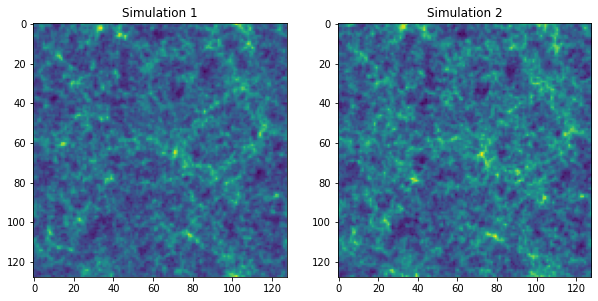

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(delta_dm1.preview(axes=[0,1]))
ax[0].set_title('Simulation 1')
ax[1].imshow(delta_dm2.preview(axes=[0,1]))
ax[1].set_title('Simulation 2')

#plt.savefig('paired_density_fields.pdf')

In [20]:
alpha = 1.3
delta_th = 0.
gamma = 0.02

galaxy_pos1 = make_catalog_g(delta_dm1.compute(mode='real') - 1. , alpha, gamma, delta_th, Length, Nc)
galaxy_pos2 = make_catalog_g(delta_dm2.compute(mode='real') - 1. , alpha, gamma, delta_th, Length, Nc)

In [21]:
Ng1 = len(galaxy_pos1)
n1 = Ng1/Length**3
Ng2 = len(galaxy_pos2)
n2 = Ng2/Length**3
print('Total of galaxies = ', Ng1, Ng2)
print('Galaxy number density = ', n1, n2)

Total of galaxies =  54925 54352
Galaxy number density =  0.00044151588722511577 0.0004369098134266635


In [22]:
ww = np.ones(len(galaxy_pos1))
with open('galaxy1_file.dat', 'wb') as ff:
    galaxy_pos1.tofile(ff); ww.tofile(ff); ff.seek(0)

galaxy_cat1 = BinaryCatalog(ff.name, [('Position', ('f8', 3)), ('Mass', ('f8', 1))], size=len(galaxy_pos1))
galaxy_cat1.attrs['BoxSize'] = np.array([Length, Length, Length])
galaxy_cat1.attrs['Nmesh'] = np.array([Nc, Nc, Nc])
delta_g1 = galaxy_cat1.to_mesh(resampler='cic', interlaced=True, compensated=True)

ww = np.ones(len(galaxy_pos2))
with open('galaxy2_file.dat', 'wb') as ff:
    galaxy_pos2.tofile(ff); ww.tofile(ff); ff.seek(0)

galaxy_cat2 = BinaryCatalog(ff.name, [('Position', ('f8', 3)), ('Mass', ('f8', 1))], size=len(galaxy_pos2))
galaxy_cat2.attrs['BoxSize'] = np.array([Length, Length, Length])
galaxy_cat2.attrs['Nmesh'] = np.array([Nc, Nc, Nc])
delta_g2 = galaxy_cat2.to_mesh(resampler='cic', interlaced=True, compensated=True)

In [23]:
bg1 = evaluate_bias(galaxy_cat1, matter_cat1)
bg2 = evaluate_bias(galaxy_cat2, matter_cat2)
print('Galaxy bias = {:.2f}, {:.2f}'.format(bg1, bg2))

Galaxy bias = 1.44, 1.34


In [24]:
observer = np.array([Length/2,Length/2,Length/2])

peculiar_field = compute_Psi(Length, Nc, (delta_dm1.compute(mode='real') - 1.))
vr = compute_vr(field_interpolation(Length, Nc, peculiar_field, galaxy_pos1), galaxy_pos1, observer, zobs)
galaxy_posRSD = boxfit_conditions(galaxy_pos1 + vr, Length)
galaxy_cat1['PositionRSD'] = galaxy_posRSD

peculiar_field = compute_Psi(Length, Nc, (delta_dm2.compute(mode='real') - 1.))
vr = compute_vr(field_interpolation(Length, Nc, peculiar_field, galaxy_pos2), galaxy_pos2, observer, zobs)
galaxy_posRSD = boxfit_conditions(galaxy_pos2 + vr, Length)
galaxy_cat2['PositionRSD'] = galaxy_posRSD

In [26]:
delta_gRSD1 = galaxy_cat1.to_mesh(position='PositionRSD', resampler='cic', interlaced=True, compensated=True)
delta_gRSD2 = galaxy_cat2.to_mesh(position='PositionRSD', resampler='cic', interlaced=True, compensated=True)

r = FFTPower(delta_g1, mode='1d')
Pkg1 = r.power['power'].real - r.power.attrs['shotnoise']
r = FFTPower(delta_gRSD1, mode='1d')
PkgRSD1 = r.power['power'].real - r.power.attrs['shotnoise']
r = FFTPower(delta_g2, mode='1d')
Pkg2 = r.power['power'].real - r.power.attrs['shotnoise']
r = FFTPower(delta_gRSD2, mode='1d')
PkgRSD2 = r.power['power'].real - r.power.attrs['shotnoise']

Text(0, 0.5, '$P(k)$ $[h^{-3} \\mathrm{Mpc}^3]$')

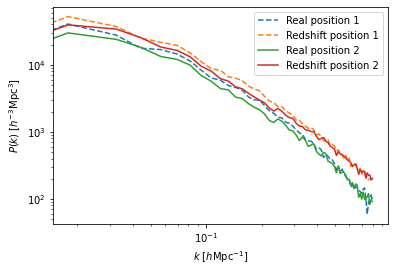

In [30]:
plt.loglog(k_array, Pkg1, '--', label='Real position 1')
plt.loglog(k_array, PkgRSD1, '--', label='Redshift position 1')
plt.loglog(k_array, Pkg2, label='Real position 2')
plt.loglog(k_array, PkgRSD2, label='Redshift position 2')
plt.legend()
plt.xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$')

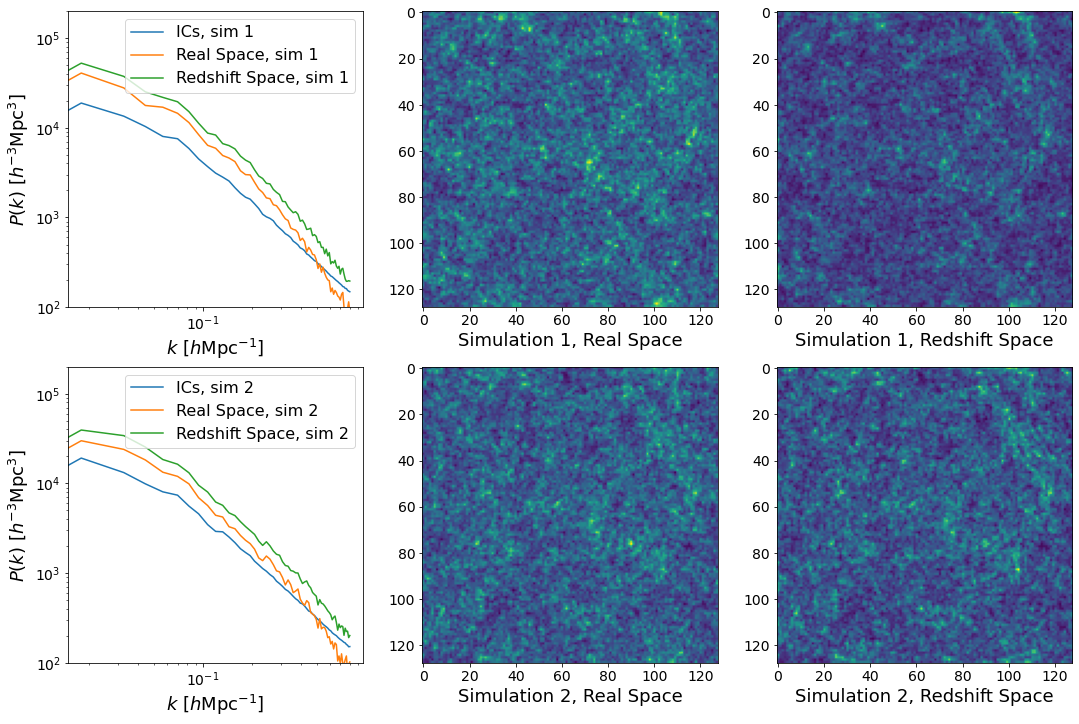

In [27]:
# Compare densifty field in physical and redshift space
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0,0].loglog(k_array, Pk1, label='ICs, sim 1')
ax[0,0].loglog(k_array, Pkg1, label='Real Space, sim 1')
ax[0,0].loglog(k_array, PkgRSD1, label='Redshift Space, sim 1')
ax[0,0].legend(fontsize='16')
ax[0,0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[0,0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$', fontsize='18')
ax[0,0].set(ylim=(1e2, 2e5))
ax[0,0].tick_params(axis='both', which='major', labelsize=14)

ax[0,1].imshow(delta_g1.preview(axes=[0,1]))
ax[0,1].set_xlabel('Simulation 1, Real Space', fontsize='18')#r'$1 + \delta_{g}$')
ax[0,1].tick_params(axis='both', which='major', labelsize=14)

ax[0,2].imshow(delta_gRSD1.preview(axes=[0,1]))
ax[0,2].set_xlabel('Simulation 1, Redshift Space', fontsize='18')#r'$1 + \delta_{g}^{s}$')
ax[0,2].tick_params(axis='both', which='major', labelsize=14)

ax[1,0].loglog(k_array, Pk2, label='ICs, sim 2')
ax[1,0].loglog(k_array, Pkg2, label='Real Space, sim 2')
ax[1,0].loglog(k_array, PkgRSD2, label='Redshift Space, sim 2')
ax[1,0].legend(fontsize='16')
ax[1,0].set_xlabel(r'$k$ $[h \mathrm{Mpc}^{-1}]$', fontsize='18')
ax[1,0].set_ylabel(r'$P(k)$ $[h^{-3} \mathrm{Mpc}^3]$', fontsize='18')
ax[1,0].set(ylim=(1e2, 2e5))
ax[1,0].tick_params(axis='both', which='major', labelsize=14)

ax[1,1].imshow(delta_g2.preview(axes=[0,1]))
ax[1,1].set_xlabel('Simulation 2, Real Space', fontsize='18')#r'$1 + \delta_{g}$')
ax[1,1].tick_params(axis='both', which='major', labelsize=14)

ax[1,2].imshow(delta_gRSD2.preview(axes=[0,1]))
ax[1,2].set_xlabel('Simulation 2, Redshift Space', fontsize='18')#r'$1 + \delta_{g}^{s}$')
ax[1,2].tick_params(axis='both', which='major', labelsize=14)

In [28]:
matter_cat1.save('Matterpaired1_catalog.bigfile')
galaxy_cat1.save('Galaxypaired1_catalog.bigfile')
matter_cat2.save('Matterpaired2_catalog.bigfile')
galaxy_cat2.save('Galaxypaired2_catalog.bigfile')